<h1 style="text-align: center;">
        PH DENGUE ANALYSIS
</h1>
<hr>
<h2 style="text-align: center;">
    Analyst : Maricel Maribojoc
</h2>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>Mortality Rate per each Region</h1>

In [6]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [7]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [8]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [9]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


<h1>Mortality per Region thru Heatmap</h1>

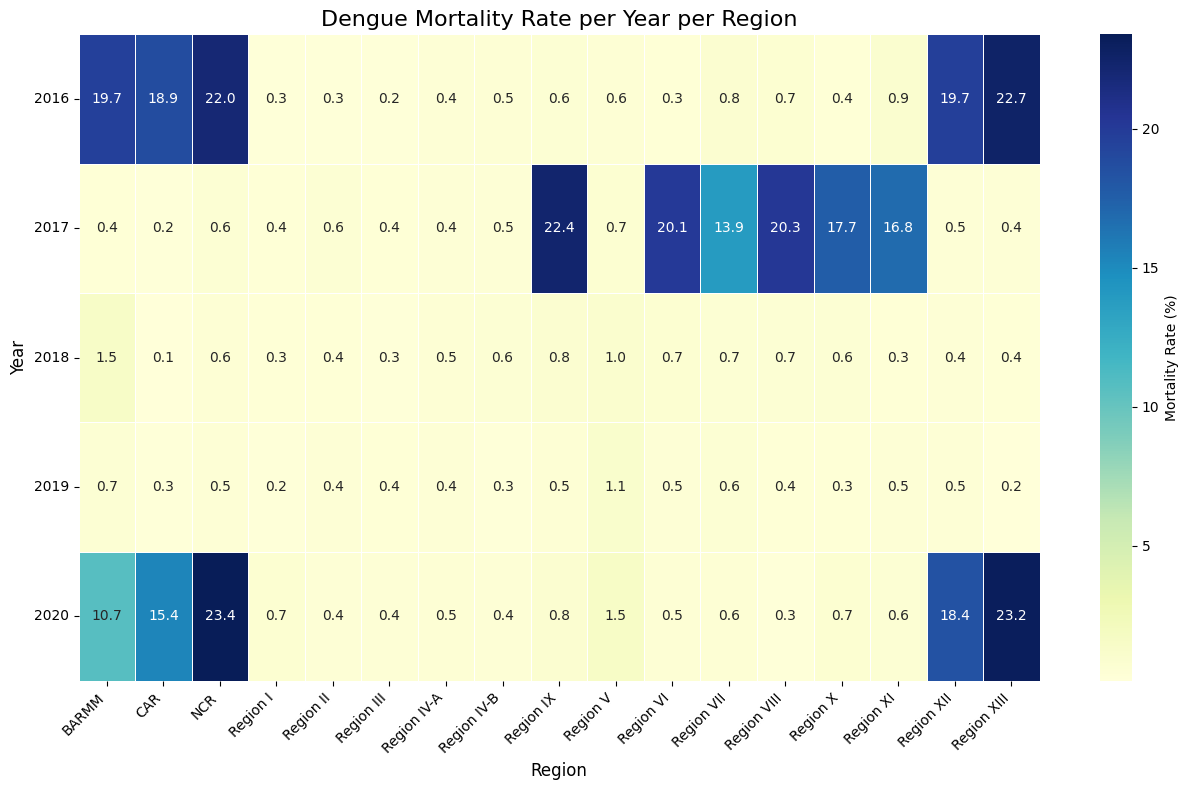

In [10]:

dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

# Create the heatmap

sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.gcf().set_size_inches(13, 8)
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h1 style="text-align: center;">
        EXPLANATORY DATA ANALYSIS
</h1>

<h2>1. How are dengue distributed accross region?</h2>

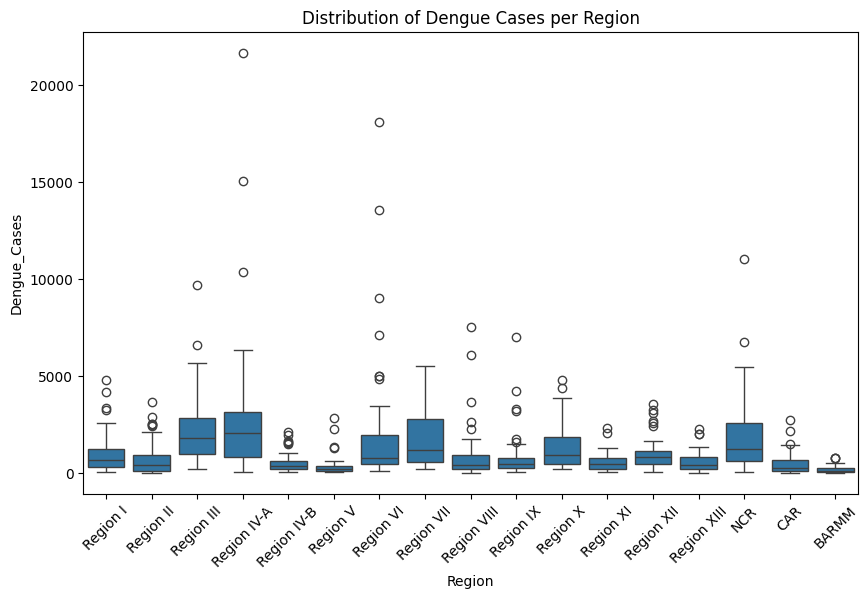

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Dengue_Cases', data=dengue)
plt.xticks(rotation=45)
plt.title("Distribution of Dengue Cases per Region")
plt.show()

<h2>INSIGHT:</h2>
<p>This visualization shows how dengue cases are distributed across the region. </p>

<h2>2. Which region in the Philipppines has the highest median number of dengue cases?</h2>

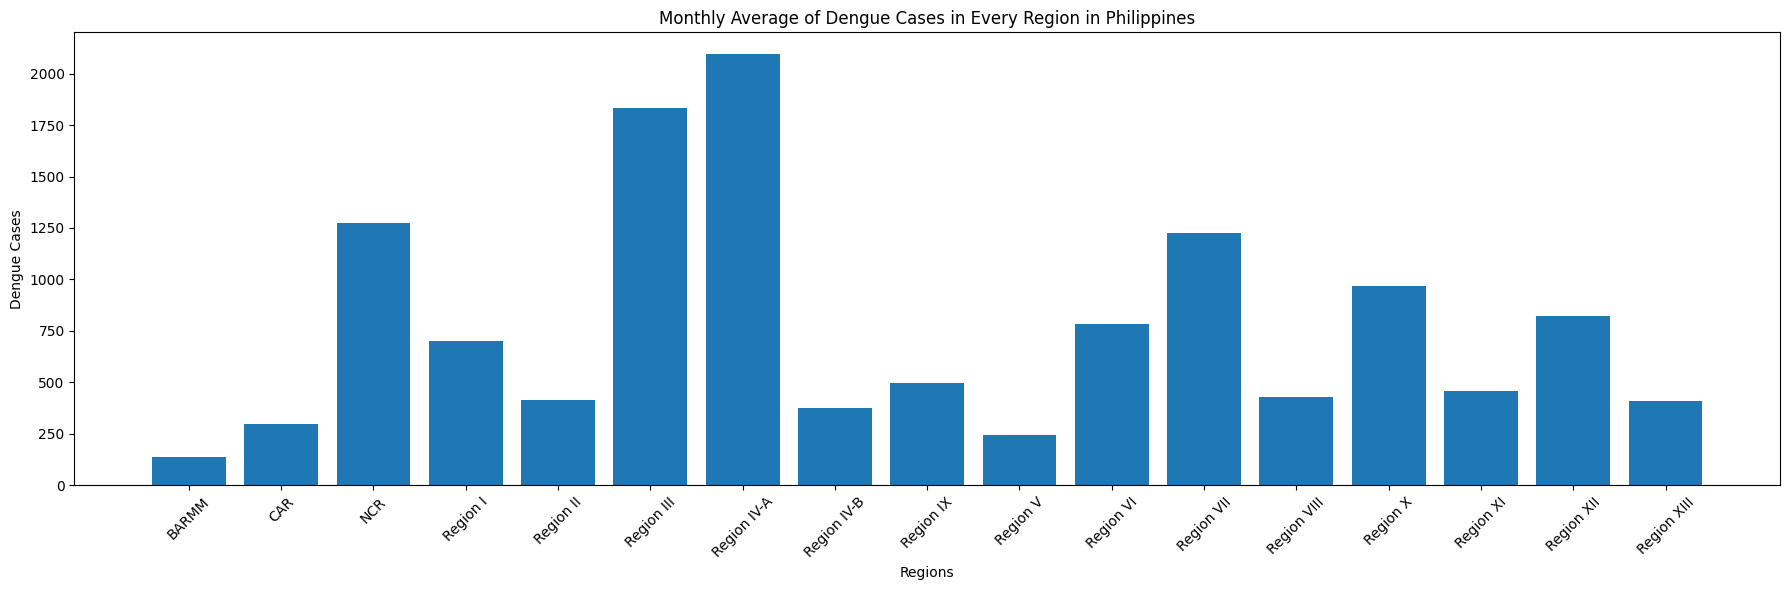

In [12]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].median()

regions = region_cases.index
cases = region_cases.values

plt.figure(figsize=(18, 6))
plt.bar(regions, cases)
plt.title('Monthly Average of Dengue Cases in Every Region in Philippines')
plt.xlabel('Regions')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

<h2>INSIGHT:</h2>
<p>This bar graph illustrates the monthly average of dengue cases across various regions in the Philippines. It highlights notable regional differences, with Regions IV-A and III having the highest averages. Other regions like NCR and Region VII also show elevated averages compared to the rest.</p>

<h2>3. What is the trend of the disease for the past 5 years? Is it going lower or higher?</h2>

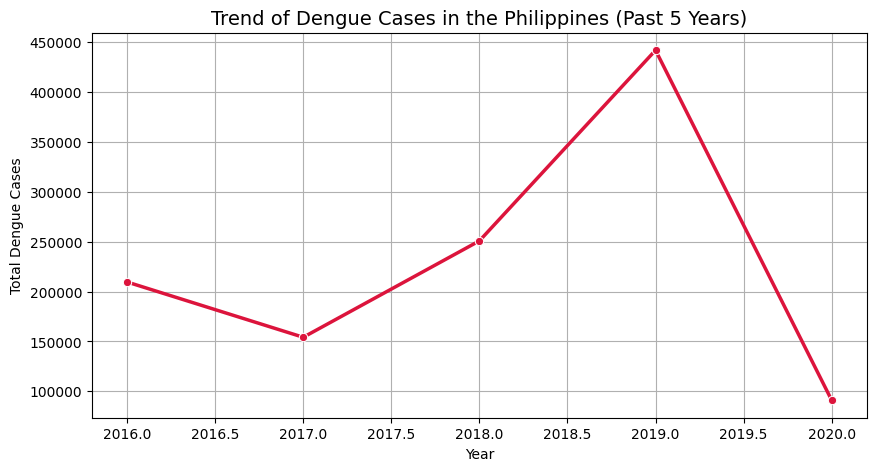

In [13]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Dengue_Cases', data=yearly_cases, marker='o', linewidth=2.5, color='crimson')
plt.title('Trend of Dengue Cases in the Philippines (Past 5 Years)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.grid(True)
plt.show()

<h2>INSIGHT:</h2>
<p>This lineplot illustrates the trend of dengue cases in the Philippines for the past five years. The data shows that 2019 has the most dengue cases compared to other years and surprisingly the cases decreases on 2020.</p>

<h2>4. What is the monthly pattern of dengue-related deaths in the Philippines from 2016 to 2020?</h2>

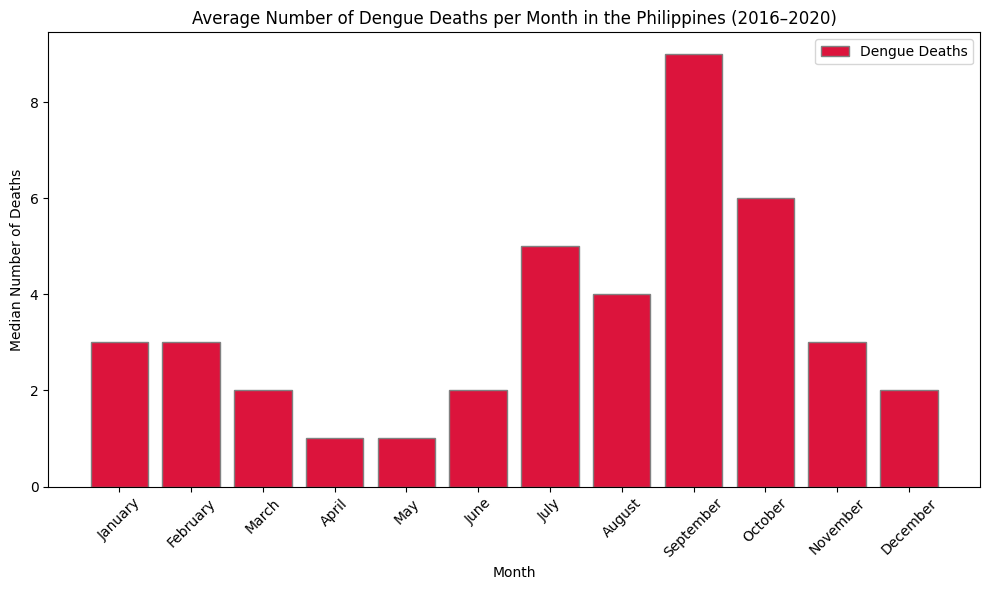

In [14]:
month_order= ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_mean_deaths = dengue.groupby('Month')['Dengue_Deaths'].median()

months = monthly_mean_deaths.index
deaths = monthly_mean_deaths.values

plt.figure(figsize=(10,6))
plt.bar(months, deaths, color='crimson', edgecolor='grey', label='Dengue Deaths')
plt.title('Average Number of Dengue Deaths per Month in the Philippines (2016–2020)')
plt.xlabel('Month')
plt.ylabel('Median Number of Deaths')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<h2>INSIGHT:</h2>
<p>This bar graph displays the average number of dengue deaths in the Philippines for each month from 2016 to 2020. The data reveals that dengue deaths peak during the months of September and October, with September showing the highest average count. There is also a noticeable increase in cases starting from July where the dengue cases start to rise, peaking in September, and then gradually decreasing towards the end of the year. This seasonal trend highlights a significant relation in dengue deaths increase during the rainy season.</p>

In [15]:
dengue['Region'].unique()

array(['Region I', 'Region II', 'Region III', 'Region IV-A',
       'Region IV-B', 'Region V', 'Region VI', 'Region VII',
       'Region VIII', 'Region IX', 'Region X', 'Region XI', 'Region XII',
       'Region XIII', 'NCR', 'CAR', 'BARMM'], dtype=object)

<h2>5. During which months did dengue cases peak or drop, and is there a noticeable increase or decrease in cases over the years?</h2>

In [16]:
region12 = dengue[dengue['Region'] == "Region XII"]

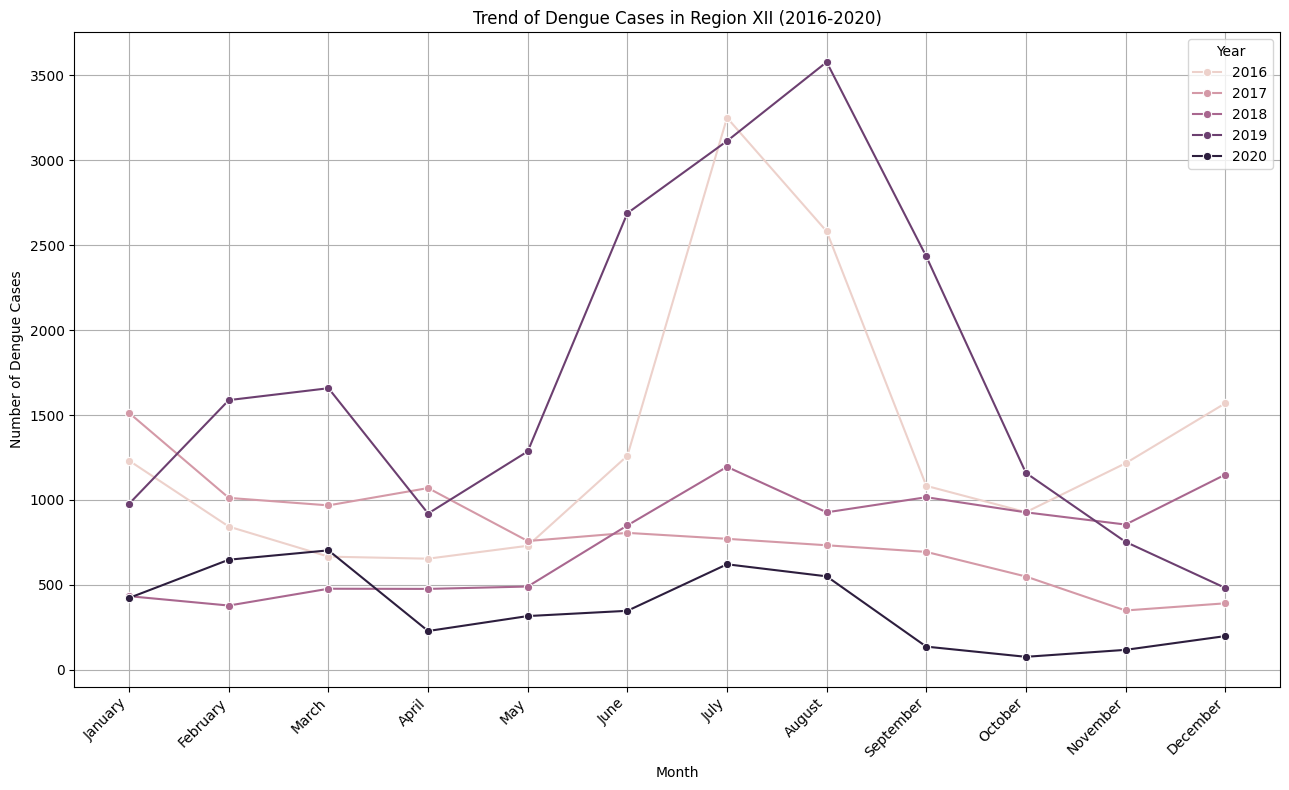

In [17]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)


# Create the line plot
plt.figure(figsize=(13,8))
sns.lineplot(data=region12, x='Month', y='Dengue_Cases', marker='o', hue='Year')

plt.title('Trend of Dengue Cases in Region XII (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h2>INSIGHT:</h2>
<p>This lineplot displays the average number of dengue cases in Region XII for each month from 2016 to 2020. The results reveals that dengue cases peak during the months of August, with August showing the highest average count. There is also a noticeable increase in cases starting from June, peaking in August, and then gradually decreasing towards the end of the year. This seasonal trend highlights a significant increase in dengue cases during the rainy season.</p>

<h2>6. How did the total number of dengue cases change across different regions of the Philippines from 2016 to 2020?</h2>

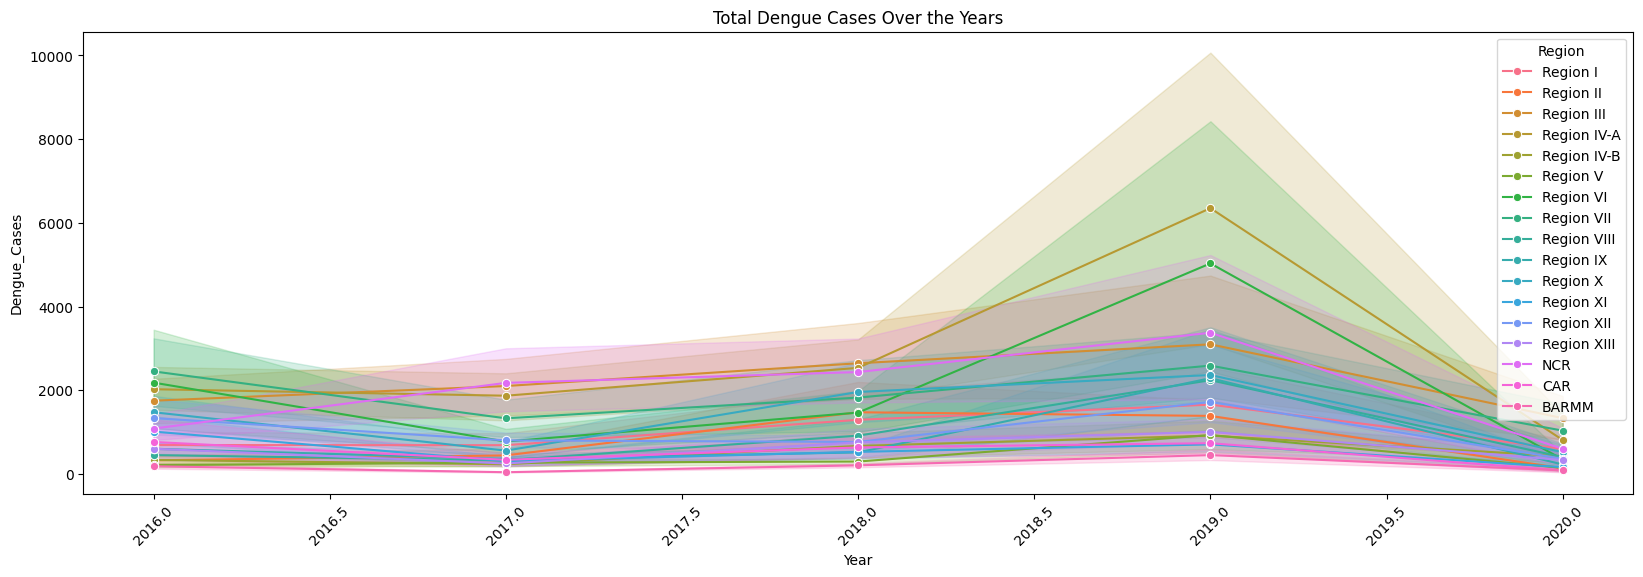

In [18]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=dengue, x='Year', y='Dengue_Cases', hue='Region', marker='o')
plt.title('Total Dengue Cases Over the Years')
plt.xticks(rotation=45)
plt.show()

<h2>INSIGHT:</h2>
<p>The plot shows how the total number of dengue cases change across the different regions og the Philippines form 2016 to 2020. The data shows that some regions has experienced a consistent rise of dengue cases, while other regions show a gradual decline after 2019. With this visulaization, it could be of help to health workers to be more focused to those area that has the highest cases of dengue.</p>

<h2>7. How do cases vary by year and region?</h2>

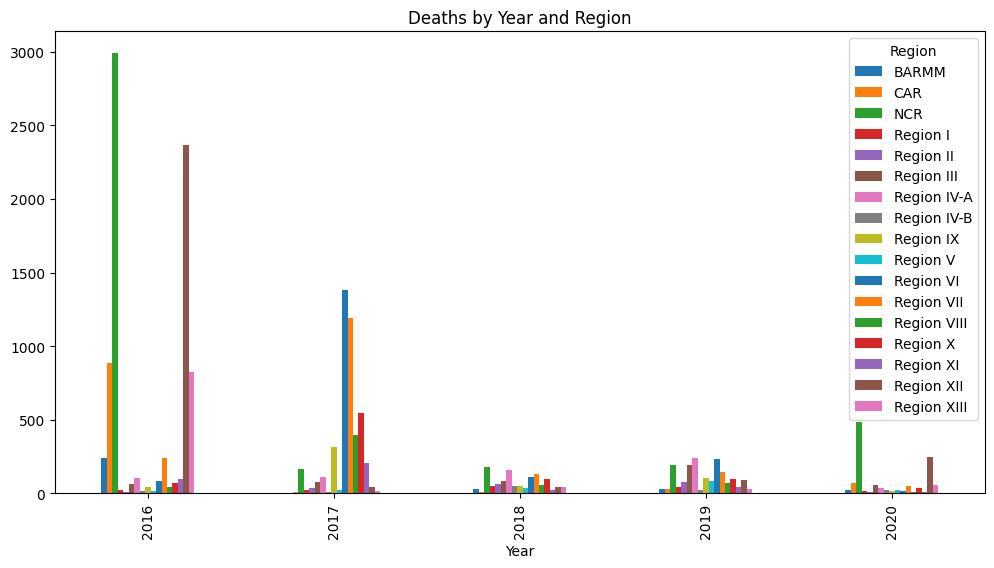

In [19]:
pivot = dengue.pivot_table(values='Dengue_Deaths', index='Year', columns='Region', aggfunc='sum')
pivot.plot(kind='bar', figsize=(12,6))
plt.title("Deaths by Year and Region")
plt.show()

<h2>INSIGHT:</h2>
<p>The bar graph illustrates the trends of deaths cause of dengue from 2016 to 2020 per region. NCR had the most deaths in 2016 followed by Region XII. The deaths gradually decreases on the following years, the deaths somehow decline from 2018 to 2020 since the DOH strengthen their programs.</p>

<h2>8. Which month has the most dengue cases?</h2>

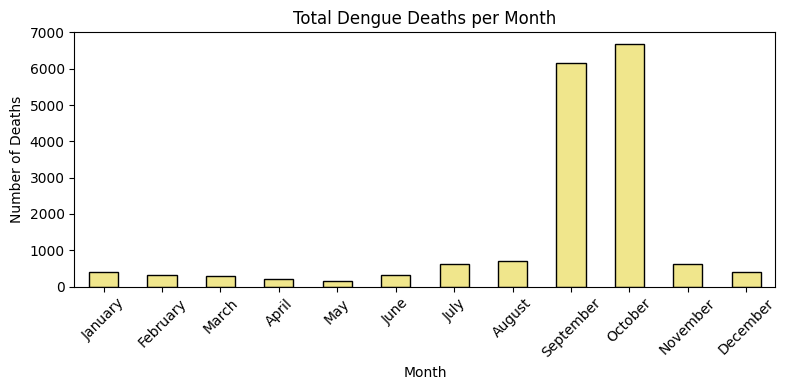

In [20]:
monthly_deaths = dengue.groupby('Month')['Dengue_Deaths'].sum()

monthly_deaths.plot(kind='bar', figsize=(8,4), color='khaki', edgecolor='black')

plt.title("Total Dengue Deaths per Month")
plt.ylabel("Number of Deaths")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>INSIGHT:</h2>
<p>The bar chart shows the total number of dengue deaths per month across the Philippines. It can be observed that dengue deaths tend to increase particularly from September to October, which corresponds to the rainy season.</p>

<h2>9. How consistent are dengue cases throughout the months for each year?</h2>

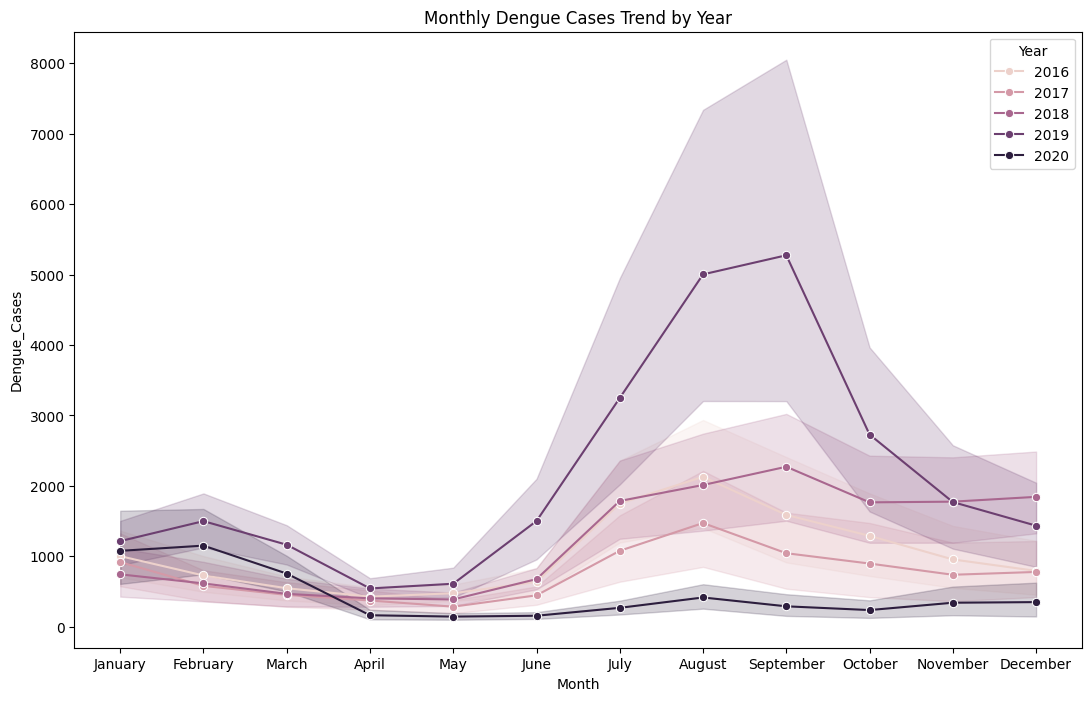

In [21]:
plt.figure(figsize=(13,8))
sns.lineplot(data=dengue, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.title('Monthly Dengue Cases Trend by Year')
plt.show()


<h2>INSIGHT:</h2>
<p>The line chart illustrates the monthly trend of dengue cases from 2016 to 2020. Across all years, dengue cases generally increase during the middle of the year from July to September, coinciding with the rainy season. Year 2019 show a significant increase in cases, indicating a possible dengue outbreak.</p>

<h2>10. Which regions show higher fatality rates?</h2>

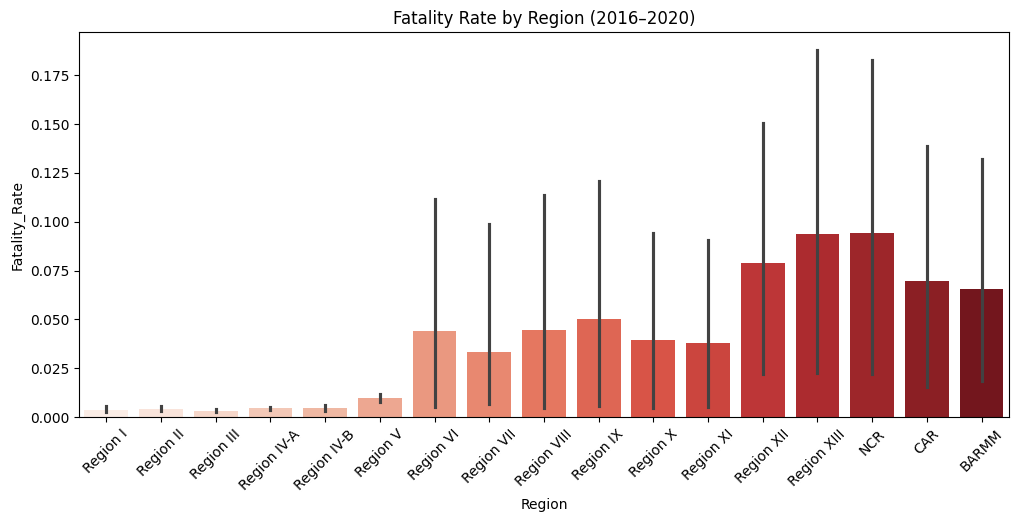

In [23]:
dengue['Fatality_Rate'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']
plt.figure(figsize=(12,5))
sns.barplot(data=dengue, x='Region', y='Fatality_Rate', palette='Reds')
plt.title('Fatality Rate by Region (2016–2020)')
plt.xticks(rotation=45)
plt.show()

<h2>INSIGHT:</h2>
<p>The chart illustrates the fatality rate from dengue across different region in the Philippines. Regions with higher fatality rates may indicate limited healthcare access or delayed treatment compared to those region that has the lowest fatality rate.</p>